In [12]:
import sys
sys.path.append('../')

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np

In [14]:
from src.models.calculate_metrics import calculate_total_return,calculate_drawdown
from src.visualization.visualize import gerar_grafico_retorno_total_portfolios

In [15]:
plt.style.use("ggplot")

In [16]:
path2 = "../data/processed/01_daily_returns_imag.csv"
path_p1 = "../data/processed/05_daily_returns_port1.csv"
path_p2 = "../data/processed/06_daily_returns_port4.csv"
path_p3 = "../data/processed/07_daily_returns_port8.csv"

In [17]:
df = pd.read_csv(path2)
df = df[df["data"]>"2010-12-30"]
df1 = pd.read_csv(path_p1)
df2 = pd.read_csv(path_p2)
df3 = pd.read_csv(path_p3)

In [18]:
def deixar_pronto(df,tipo):
  
  df_teste = pd.DataFrame(df["data"])
  if tipo == "tipo1":
    df_teste["acumulado"] = calculate_total_return(df.iloc[:,0])
    picos,drawdown = calculate_drawdown(df.iloc[:,0])
  elif tipo == "tipo2":
    df_teste["acumulado"] =calculate_total_return(df.iloc[:,0]/100)
    picos,drawdown = calculate_drawdown(df.iloc[:,0]/100)
  elif tipo == "tipo3":
    df_teste["acumulado"] =calculate_total_return(df.iloc[:,1])
    picos,drawdown = calculate_drawdown(df.iloc[:,1])
  df_teste["picos"] = picos
  df_teste["drawdown"]=drawdown
  
  return df_teste

In [19]:
df_teste = deixar_pronto(df,"tipo3")
df_teste2 = deixar_pronto(df1,"tipo1")
df_teste3 = deixar_pronto(df2,"tipo1")
df_teste4 = deixar_pronto(df3,"tipo1")


In [20]:
dataframes  = [df_teste,df_teste2,df_teste3,df_teste4]
benchmarks  = ["IMAG","PORT1","PORT4","PORT8"]


In [21]:
path_load = "../reports/figures/"

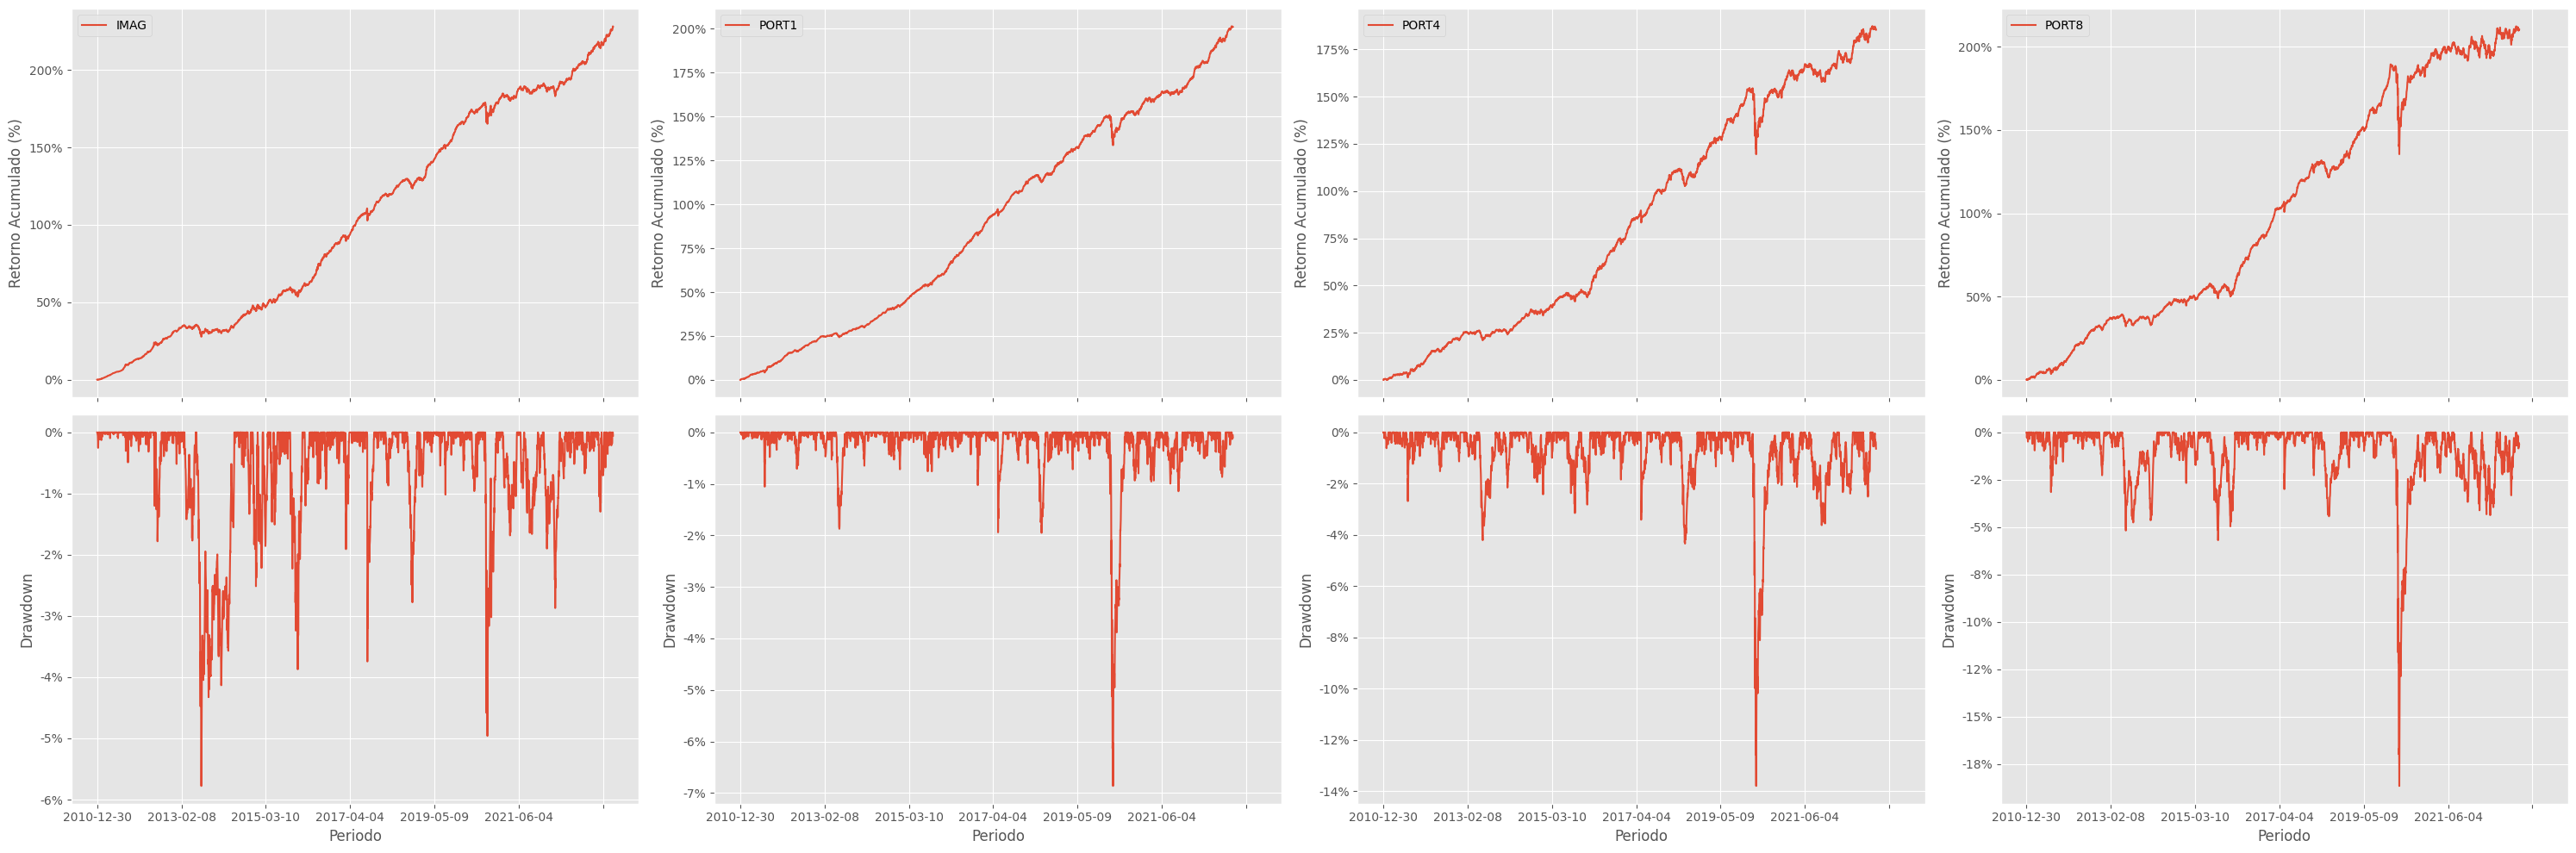

In [22]:
fig1 = gerar_grafico_retorno_total_portfolios(dataframes,benchmarks,path_load,"retorno_total_portfolios3.png")
